# <h1><center>CUSTOMER DATA PREPROCESSING</center></h1>
Using standard python (No pandas / seaborn) with default libraries (os, sys, time, json, csv, 
…) you have been given the following tasks:

# Task.1
Read in the provided ACW Data using the CSV library.

In [45]:
#importing all libraries
import csv
import json

In [46]:
with open('acw_user_data.csv') as csv_file:
    csv_reader=csv.reader(csv_file, delimiter=',')
    for stats in csv_reader:
        print(stats)

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup']
['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe']
['Studio 33K Joel walk', 'Randallborough', 'ME3N 1G

# Task.2

In [47]:
Rich_Structure=[] #Creating a list to properly structure the data
with open('acw_user_data.csv', 'r') as csv_file:
    csv_reader=csv.DictReader(csv_file)
    for details in csv_reader:
        info=list(details) #converting and structing all column into a proper way through clean up 
        
        details["First_Name"]=details["First Name"]
        details["Second_Name"]=details["Last Name"]
        details["Age"]=int(details['Age (Years)'])
        details["Sex"]=details["Sex"]
        details["retired"]=details["Retired"]
        details["Marital_Status"]=details["Marital Status"]
        details["dependants"]=details["Dependants"]
        details["Salary"]=int(details["Yearly Salary (GBP)"])
        details["Pension"]=details["Yearly Pension (GBP)"]
        details["Company_name"]=details["Employer Company"]
        details["Commute_distance"]=float(details["Distance Commuted to Work (miles)"])
        #creating a separate dictionary for vehicle details
        details["Vehicle"]={"Vehicle_make": details["Vehicle Make"],
                         "Vehicle_model":details["Vehicle Model"],
                         "Vehicle_year":int(details["Vehicle Year"]),
                         "Vehicle_type": details["Vehicle Type"]
                        }
        #creating a separate dictionary for credit card details               
        details["Credit_Card"]={"Creditcard_startdate":details["Credit Card Start Date"],
                             "Credit_card_expiry_date":details["Credit Card Expiry Date"],
                             "Creditcard_number":int(details["Credit Card Number"]),
                             "Creditcard_cvv":int(details["Credit Card CVV"]),
                             "IBAN":details["Bank IBAN"]
                            }
        #creating a separate dictionary for Address details 
        details["Address"]={"Address_street":details["Address Street"],
                         "Address_city":details["Address City"],
                         "Address_Postcode":details["Address Postcode"]
                        }
        for data in info:
            del details[data] #deteling existing data within data structure
        Rich_Structure.append(details)
        
print(Rich_Structure)

[{'First_Name': 'Kieran', 'Second_Name': 'Wilson', 'Age': 89, 'retired': 'True', 'Marital_Status': 'married or civil partner', 'dependants': '3', 'Salary': 72838, 'Pension': '7257', 'Company_name': 'N/A', 'Commute_distance': 0.0, 'Vehicle': {'Vehicle_make': 'Hyundai', 'Vehicle_model': 'Bonneville', 'Vehicle_year': 2009, 'Vehicle_type': 'Pickup'}, 'Credit_Card': {'Creditcard_startdate': '08/18', 'Credit_card_expiry_date': '11/27', 'Creditcard_number': 676373692463, 'Creditcard_cvv': 875, 'IBAN': 'GB62PQKB71416034141571'}, 'Address': {'Address_street': '70 Lydia isle', 'Address_city': 'Lake Conor', 'Address_Postcode': 'S71 7XZ'}}, {'First_Name': 'Jonathan', 'Second_Name': 'Thomas', 'Age': 46, 'retired': 'False', 'Marital_Status': 'married or civil partner', 'dependants': '1', 'Salary': 54016, 'Pension': '0', 'Company_name': 'Begum-Williams', 'Commute_distance': 13.72, 'Vehicle': {'Vehicle_make': 'Nissan', 'Vehicle_model': 'ATS', 'Vehicle_year': 1996, 'Vehicle_type': 'Coupe'}, 'Credit_Car

# Task.3

In [48]:
problematic_rows=[] #creating a new empty list by a name problematic_rows as asked in a task.3
for data, stats in enumerate (Rich_Structure):
    info = stats["dependants"]
    if info=="":
        problematic_rows.append(data)
print(problematic_rows)

[21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


# Task.4

In [49]:
with open('processed.json','w') as processed_json:
    json.dump(Rich_Structure, processed_json, indent=4)

# Task.5

Retired Json

In [50]:
with open('retired.json', 'w') as retired_json: #Writing data for retired people into retired.json
    json.dump([stats for stats in Rich_Structure if stats['retired'] == "True"], retired_json, indent=4)

Employed Json

In [51]:
with open('employed.json', 'w') as employed_json: #Writing data for employed people into retired.json
    json.dump([stats for stats in Rich_Structure if stats['retired'] == "False"], employed_json, indent=4)

# Task.6 

In [52]:
def flag_credit_card():
    eject_card=[]
    for data in Rich_Structure:
        expiry_month, expiry_year = data["Credit_Card"]["Credit_card_expiry_date"].split('/')
        start_month, start_year = data["Credit_Card"]["Creditcard_startdate"].split('/')                                                                
        if int(expiry_year) - int(start_year) > 10:
            eject_card.append(data)
    with open('removed_card', 'w') as removed_json:
        json.dump(eject_card, removed_json, indent=4)
    return eject_card
print(flag_credit_card())

[{'First_Name': 'Jonathan', 'Second_Name': 'Thomas', 'Age': 46, 'retired': 'False', 'Marital_Status': 'married or civil partner', 'dependants': '1', 'Salary': 54016, 'Pension': '0', 'Company_name': 'Begum-Williams', 'Commute_distance': 13.72, 'Vehicle': {'Vehicle_make': 'Nissan', 'Vehicle_model': 'ATS', 'Vehicle_year': 1996, 'Vehicle_type': 'Coupe'}, 'Credit_Card': {'Creditcard_startdate': '08/12', 'Credit_card_expiry_date': '11/26', 'Creditcard_number': 4529436854129855, 'Creditcard_cvv': 583, 'IBAN': 'GB37UMCO54540228728019'}, 'Address': {'Address_street': '00 Wheeler wells', 'Address_city': 'Chapmanton', 'Address_Postcode': 'L2 7BT'}}, {'First_Name': 'Julian', 'Second_Name': 'Potter', 'Age': 43, 'retired': 'False', 'Marital_Status': 'single', 'dependants': '3', 'Salary': 96645, 'Pension': '0', 'Company_name': 'Clark Group', 'Commute_distance': 20.05, 'Vehicle': {'Vehicle_make': 'Lexus', 'Vehicle_model': 'S-Series', 'Vehicle_year': 1998, 'Vehicle_type': 'Van/Minivan'}, 'Credit_Card':

# Task.7

In [53]:
with open('processed.json','r') as processed: #reading data in processed.json
    processed_data=json.load(processed) #loading data in processed.json

    for stats in processed_data:
        if stats['Commute_distance'] <=1: #customers travelling <= commute miles
            stats['Address']['Salary_Commute']= stats['Salary'] #creating a data attribute for commute salary earned per mile
        else:
            stats['Address']['Salary_Commute']=stats['Salary']/stats["Commute_distance"]
    sorted_by_salarycommute= sorted(processed_data, key=lambda x: x["Address"]['Salary_Commute'])
    
    with open('commute.json','w') as commute_json: #Writing data into new file namely commute.json
        json.dump(sorted_by_salarycommute, commute_json, indent=4)

# Data Visualisation 
Using Pandas and Seaborn
Your client wishes to understand the data they have on their customers a bit more by use of 
visualisations. With use of Pandas and Seaborn read in the original CSV file provided with
the assignment.

# Task.1
Obtain the Data Series for Salary, and Age, and calculate the following: 
a. Mean Salary 
b. Median Age

In [54]:
#importing all libraries
import pandas as pd
import seaborn as sns
import math
%matplotlib inline

In [55]:
acw_data = pd.read_csv('acw_user_data.csv')

a. Mean Salary

In [56]:
print('Age Mean ',acw_data['Age (Years)'].mean())

Age Mean  54.302


b. Median Age

In [57]:
print('Age Median ',acw_data['Age (Years)'].median())

Age Median  54.0


# Task.2
Perform univariate plots of the following data attributes:
a. Age, calculating how many bins would be required for a bin_width of 5

In [58]:
acw_data['Age (Years)'].describe()

count    1000.000000
mean       54.302000
std        21.319646
min        18.000000
25%        36.000000
50%        54.000000
75%        72.000000
max        91.000000
Name: Age (Years), dtype: float64

In [59]:
math.sqrt(acw_data['Age (Years)'].count()) #number of bits = squareroot of number of data points

31.622776601683793

b. Dependents, fixing data errors with seaborn itself

19

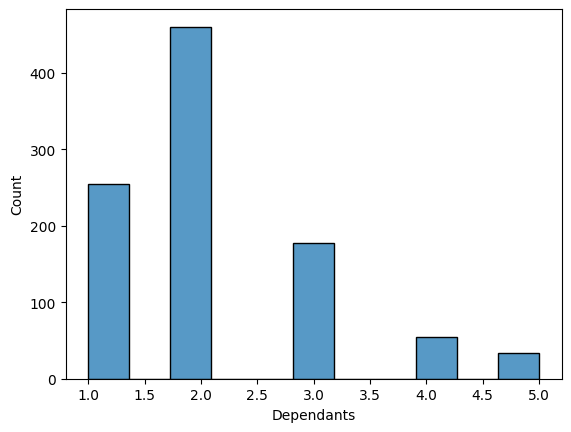

In [60]:
Dependants_plt=sns.histplot(data=acw_data, x='Dependants') #fix dependents' data
acw_data['Dependants'].isnull().sum()

In [61]:
#filling missing value
acw_data['Dependants'].fillna(value='mode()', inplace=True)

In [62]:
acw_data['Dependants'].isnull().sum() #Showing zero errors, it indicates that all errors are fixed

0

c. Age (of default bins), conditioned on Marital Status

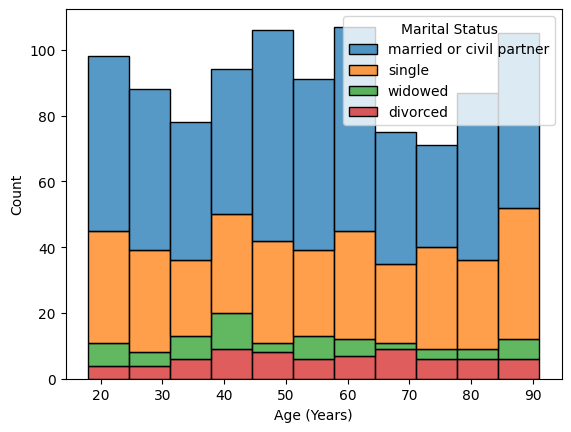

In [63]:
Age_plt=sns.histplot(data=acw_data, x='Age (Years)', hue='Marital Status', multiple='stack')

# Task.3
Perform multivariate plots with the following data attributes:
a. Commuted distance against salary

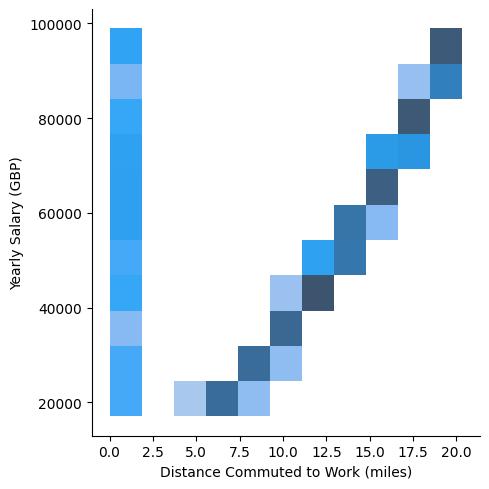

In [64]:
Distance_Salary_plt=sns.displot(data=acw_data, x= 'Distance Commuted to Work (miles)', y= 'Yearly Salary (GBP)')

b. Age against Salary

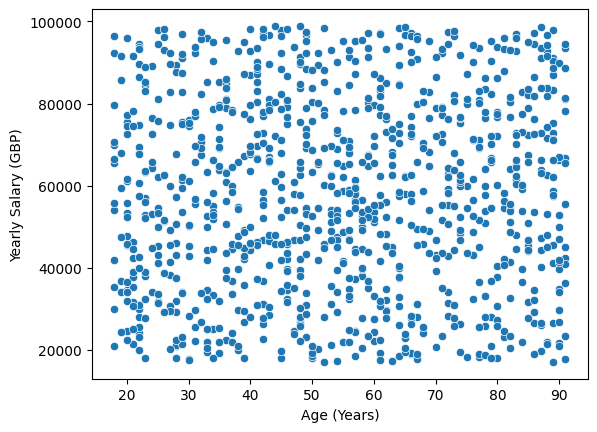

In [65]:
Age_Salary_plt=sns.scatterplot(data=acw_data, x= 'Age (Years)', y= 'Yearly Salary (GBP)')

c. Age against Salary conditioned by Dependants 

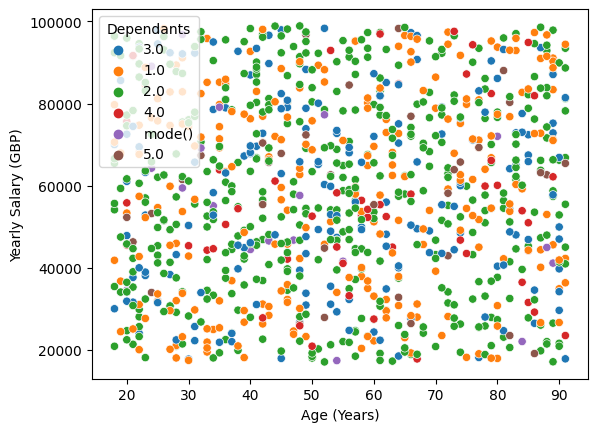

In [66]:
Age_Dependents_plt = sns.scatterplot(data=acw_data, x="Age (Years)", y="Yearly Salary (GBP)", hue="Dependants")

# Task.4
Your client would like the ability to save the plots which you have produced. Provide 
a Notebook cell which can do this.

In [67]:
#Saving all plots under their respective titles 
def SavePlots():
    Dependants_plt.figure.savefig("Dependants_plot.png")
    Age_plt.figure.savefig("Age_plot.png")
    Distance_Salary_plt.figure.savefig("Distance_Salary_plot.png")
    Age_Salary_plt.figure.savefig("Age_Salary__plot.png")
    Age_Dependents_plt.figure.savefig("Age_Dependents_plot.png")
SavePlots()